Using TensorFlow backend.


(50000, 28, 28) (50000,)


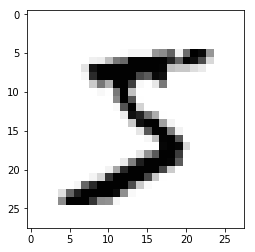

In [1]:
import tensorflow as tf
from tensorflow import InteractiveSession
s = InteractiveSession()
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import numpy as np

In [3]:
input_shape = (None, 28*28)
hidden_1 = 1000
hidden_2 = 10

In [4]:
input_X = tf.placeholder(dtype=tf.float32, shape=input_shape)
input_y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

input_X, input_y

(<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>)

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preproc_input(X, y):
    labels = LabelEncoder().fit_transform(y)[:, None]
    y = OneHotEncoder().fit_transform(labels).todense()

    X = X.reshape(X.shape[0], 28*28)
    return X, y

In [6]:
X_train, y_train = preproc_input(X_train, y_train)

In [7]:
X_val, y_val = preproc_input(X_val, y_val)

In [8]:
X_train.shape, y_train.shape

((50000, 784), (50000, 10))

In [9]:
weights_1 = tf.Variable(dtype=tf.float32, 
                        initial_value=tf.random_normal(shape=(28*28, hidden_1)), 
                        expected_shape=(28*28, hidden_1))
bias_1 = tf.Variable(dtype=tf.float32, 
                     initial_value=tf.ones((1, hidden_1)),
                     expected_shape=(1, hidden_1))

weights_2 = tf.Variable(dtype=tf.float32, 
                        initial_value=tf.random_normal(shape=(hidden_1, hidden_2)), 
                        expected_shape=(hidden_1, hidden_2))
bias_2 = tf.Variable(dtype=tf.float32, 
                     initial_value=tf.ones((1, hidden_2)),
                     expected_shape=(1, hidden_2))
weights_1, weights_2, bias_1, bias_2

(<tf.Variable 'Variable:0' shape=(784, 1000) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(1000, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 1000) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 10) dtype=float32_ref>)

In [10]:
input_1 = tf.nn.softmax(tf.add(tf.matmul(input_X, weights_1), bias_1))
input_2 = tf.nn.softmax(tf.add(tf.matmul(input_1, weights_2), bias_2))

input_1, input_2

(<tf.Tensor 'Softmax:0' shape=(?, 1000) dtype=float32>,
 <tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>)

In [11]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=input_y, logits=input_2)

In [12]:
correct_answers = tf.equal(tf.argmax(input_y, 1), tf.argmax(input_2, 1))
acc = tf.reduce_mean(tf.cast(correct_answers, tf.float32))

In [15]:
# train_loss = []
# val_loss = []

# optimizer = tf.train.AdamOptimizer().minimize(loss)
# s.run(tf.global_variables_initializer())

# min_loss = 999
# early_stopping = 10
# count = 0
# i = 0

while True:
    indices = np.random.choice(X_train.shape[0], 100)
    s.run(optimizer, {input_X: X_train[indices], input_y: y_train[indices]})
    loss_i_train = s.run(loss, feed_dict={input_X: X_train[indices], input_y: y_train[indices]})
    loss_i_val = s.run(loss, feed_dict={input_X: X_val, input_y: y_val})
    if loss_i_val < min_loss and count <= early_stopping:
        min_loss = loss_i_val
        count = 0
    elif count > early_stopping:
        break
    else:
        count += 1
    train_loss.append(loss_i_train)
    val_loss.append(loss_i_val)
    if i % 10 == 0:         
        accuracy = s.run(acc, feed_dict={input_X: X_val, input_y: y_val})
        print(weights_1.eval().sum(), weights_2.eval().sum())
        print(f'{i}, loss at iter = {loss_i_train}, val_loss = {loss_i_val}, acc = {accuracy}')
    i += 1

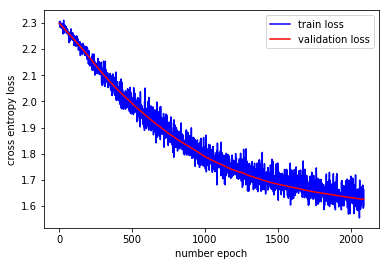

In [14]:
axis_x = [g for g in range(len(train_loss))]
plt.plot(axis_x, train_loss, 'b')
plt.plot(axis_x, val_loss, 'r')
plt.xlabel('number epoch')
plt.ylabel('cross entropy loss')
plt.legend(['train loss', 'validation loss'])